# 1. importing  required  libraries

In [2]:
! pip install seaborn

In [3]:
# downloading libraries for Data Feature works
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# downloading libraries for model training
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
! pip install xgboost
! pip install lightgbm
! pip install catboost
! pip install mlxtend

In [5]:
# XGBoost
from xgboost import XGBClassifier

# LightGBM
from lightgbm import LGBMClassifier

# CatBoost
from catboost import CatBoostClassifier


# 2. Data loading

In [6]:
x_train = pd.read_csv("C:/data/Train_60/Train_60/Train_60/X_Train_Data_Input.csv")
y_train = pd.read_csv("C:/data/Train_60/Train_60/Train_60/Y_Train_Data_Target.csv")
x_test = pd.read_csv("C:/data/Test_20/Test_20/Test_20/X_Test_Data_Input.csv")
y_test = pd.read_csv("C:/data/Test_20/Test_20/Test_20/Y_Test_Data_Target.csv")

x_train.sample()

,ID,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,...,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21
741417,59fe45060a4de7e42f0b19831795ed59,0.0,419,2550.0,0.678139,0.701403,-0.007469,1.019984,-0.015607,0.379684,...,0,0,0.001351,0.00339,0.0,0,0.0,0,0,0


# 3. Feature engineering

In [7]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785133 entries, 0 to 785132
Data columns (total 23 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ID        785133 non-null  object 
 1   Column0   785124 non-null  float64
 2   Column1   785133 non-null  int64  
 3   Column2   785133 non-null  float64
 4   Column3   658830 non-null  float64
 5   Column4   657423 non-null  float64
 6   Column5   617953 non-null  float64
 7   Column6   781283 non-null  float64
 8   Column7   785133 non-null  float64
 9   Column8   781283 non-null  float64
 10  Column9   52996 non-null   float64
 11  Column10  785133 non-null  int64  
 12  Column11  785133 non-null  int64  
 13  Column12  785133 non-null  int64  
 14  Column13  785133 non-null  int64  
 15  Column14  419430 non-null  float64
 16  Column15  768677 non-null  float64
 17  Column16  785133 non-null  float64
 18  Column17  785133 non-null  int64  
 19  Column18  785133 non-null  float64
 20  Colu

**Checking the numerical column stats**

In [8]:
pd.set_option('display.max_rows', 100)
x_train.describe()

,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,...,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21
count,785124.000000,785133.000000,785133.000000,658830.000000,657423.000000,617953.000000,781283.000000,785133.000000,781283.000000,52996.000000,...,785133.000000,785133.000000,419430.000000,768677.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000
mean,0.440757,1321.788614,2951.279411,-0.000210,-0.000855,-0.000367,-0.000709,0.000727,-0.000158,0.005245,...,0.363122,0.328285,-0.000863,-0.000837,0.001206,0.270092,0.147856,0.018759,0.009351,0.002757
std,1.163275,907.267965,2143.140140,0.999935,1.000350,1.015255,0.998984,1.045883,1.056769,1.111058,...,0.480900,0.469589,1.291202,1.283393,0.034855,3.128214,0.430530,0.135671,0.096249,0.052439
min,0.000000,-1080.000000,-47.000000,-2.028572,-1.855728,-0.007469,-0.407939,-0.015607,-0.774979,-0.088554,...,0.000000,0.000000,-832.749615,-1091.545904,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,515.000000,1129.000000,-0.675216,-0.577162,-0.007469,-0.407939,-0.015607,-0.774979,-0.086503,...,0.000000,0.000000,0.001351,0.003390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1173.000000,2709.000000,0.678139,0.701403,-0.007469,-0.407939,-0.015607,0.122085,-0.081820,...,0.000000,0.000000,0.001351,0.003390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2435.000000,4472.000000,0.678139,0.701403,-0.007468,-0.367723,-0.015607,0.625528,-0.063140,...,1.000000,1.000000,0.001351,0.003390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,18.000000,2499.000000,10290.000000,0.678139,0.701403,551.421127,14.985817,201.687947,323.992484,133.911803,...,1.000000,1.000000,8.514416,0.012736,2.000000,728.000000,12.000000,1.000000,1.000000,1.000000


**For this type of large dataset  using mean value to fill Na values in neumerical columns** 

In [9]:
# removing NA values from X_train
continuous_columns = ['Column0','Column1','Column2','Column3','Column4','Column5','Column6','Column7','Column8','Column9','Column14','Column15']
x_train[continuous_columns] = x_train[continuous_columns].apply(lambda col: col.fillna(col.mean()), axis=0)
x_train.isna().sum()

ID          0
Column0     0
Column1     0
Column2     0
Column3     0
Column4     0
Column5     0
Column6     0
Column7     0
Column8     0
Column9     0
Column10    0
Column11    0
Column12    0
Column13    0
Column14    0
Column15    0
Column16    0
Column17    0
Column18    0
Column19    0
Column20    0
Column21    0
dtype: int64

In [10]:
x_test[continuous_columns] = x_test[continuous_columns].apply(lambda col: col.fillna(col.mean()), axis=0)
x_test.isna().sum()

ID          0
Column0     0
Column1     0
Column2     0
Column3     0
Column4     0
Column5     0
Column6     0
Column7     0
Column8     0
Column9     0
Column10    0
Column11    0
Column12    0
Column13    0
Column14    0
Column15    0
Column16    0
Column17    0
Column18    0
Column19    0
Column20    0
Column21    0
dtype: int64

In [11]:
y_test.shape,x_test.shape

((261712, 2), (261712, 23))

Checking for proper alignment in the data

In [12]:
aligned = x_test.index.equals(y_test.index)
print("X_train and y_train are aligned index-wise:", aligned)


X_train and y_train are aligned index-wise: True


# Checking  for  outliers

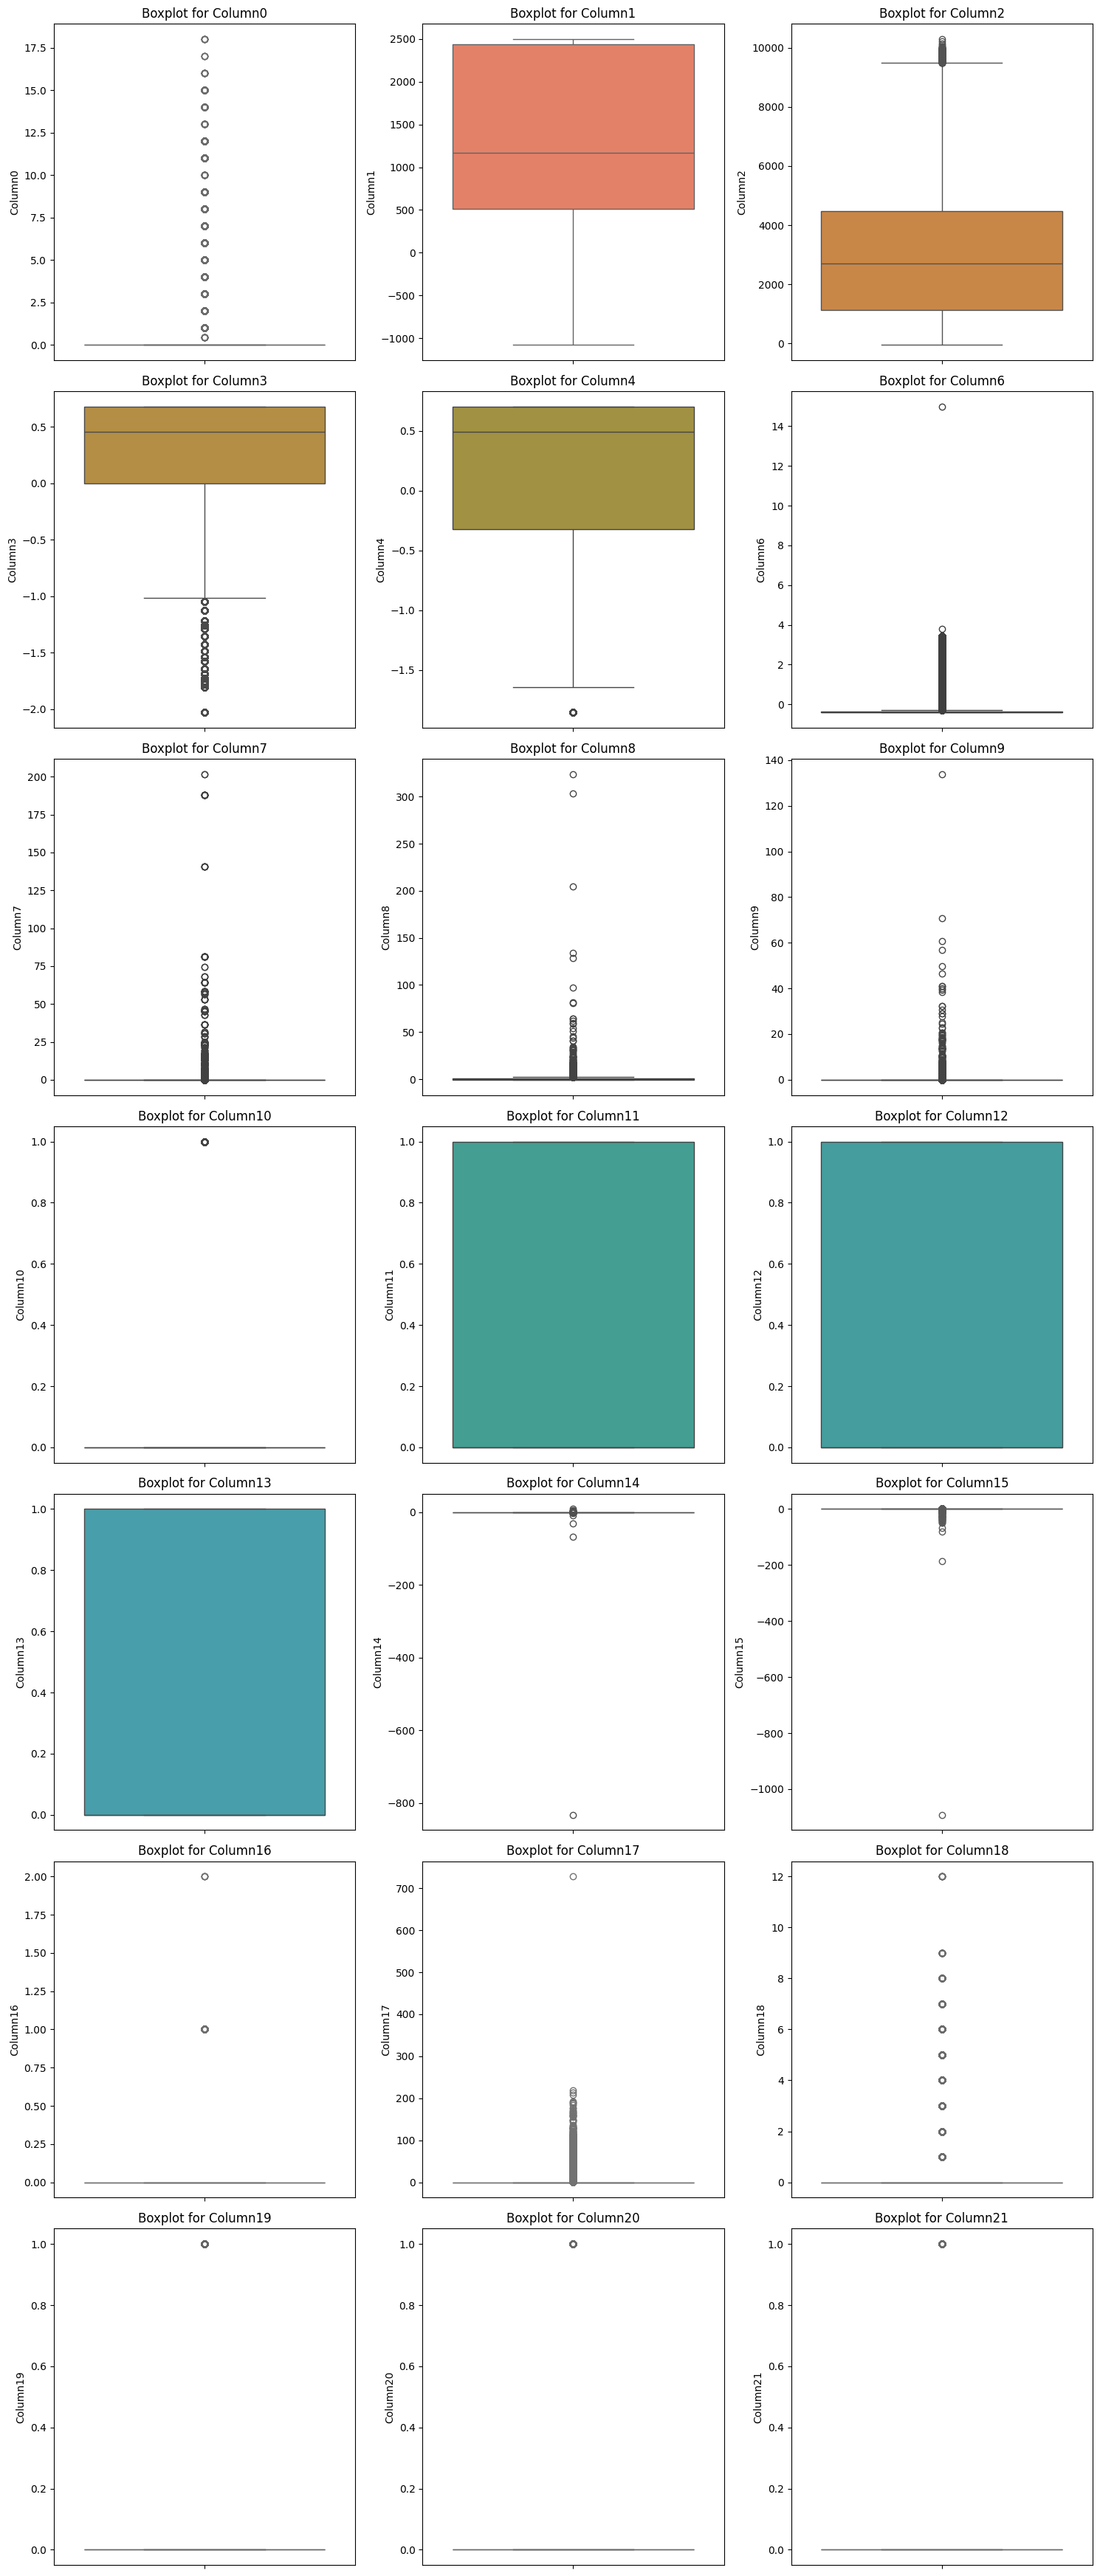

In [13]:
# dropping columns
df = x_train.drop(['ID', 'Column5'], axis=1)
df = df.astype('float32')
df_filled = df.fillna(df.mean())

# Define number of columns and rows for subplots
n_cols = 3  # Number of columns for subplots
n_rows = (len(df_filled.columns) + n_cols - 1) // n_cols  # Calculate rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()  # Flatten to easily iterate over

# Define colors for boxplots
colors = sns.color_palette("husl", len(df_filled.columns))

# Iterate over each column and create a boxplot
for idx, column in enumerate(df_filled.columns):
    sns.boxplot(data=df_filled, y=column, ax=axes[idx], color=colors[idx])
    axes[idx].set_title(f'Boxplot for {column}')
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel(column)

# Adjust layout
plt.tight_layout()
plt.show()


In [14]:
# This library will help in handeling various tasks for imbalanced data
! pip install imbalanced-learn

In [15]:
# Removing ID column
X_train = x_train.drop(["ID"],axis=1)
X_test = x_test.drop(["ID"],axis=1)
y_train_ = y_train.drop(["ID"],axis=1)
y_test_ = y_test.drop(["ID"],axis=1)


In [16]:
# custom function for scaling continuous neumerical columns
def preprocess_features(df):
    scaler = StandardScaler()
    df_scaled = df.copy()
    df_scaled[continuous_columns] = scaler.fit_transform(df_scaled[continuous_columns])

    return df_scaled

X_test_processed = preprocess_features(X_test)
X_train_processed = preprocess_features(X_train)


# Imbalanced data fixing ---> SMOTE

In [17]:
# making custom function for data preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle

def preprocess_and_balance(X_train, y_train, smote_ratio=1.0):
    # Ensure y_train is a Series
    if not isinstance(y_train, pd.Series):
        raise ValueError("y_train should be a pandas Series")

    # Merge X_train and y_train into a single DataFrame
    df = pd.concat([X_train, y_train], axis=1)

    # Extract the name of the target column
    target_column = y_train.name

    # Separate features and target
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Apply SMOTE
    smote = SMOTE(sampling_strategy=smote_ratio, random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)
    
    # Create DataFrames from resampled arrays
    X_train_balanced = pd.DataFrame(X_resampled, columns=X.columns)
    y_train_balanced = pd.Series(y_resampled, name=target_column)
    
    # Shuffle the balanced dataset
    X_train_balanced, y_train_balanced = shuffle(X_train_balanced, y_train_balanced, random_state=42)
    
    return X_train_balanced, y_train_balanced



In [18]:
y_train_series = y_train_.iloc[:, 0]
y_test_series = y_test_.iloc[:, 0]
type(y_test_series)

pandas.core.series.Series

In [19]:
X_train_balanced, y_train_balanced = preprocess_and_balance(X_train_processed, y_train_series)
X_test_balanced, y_test_balanced = preprocess_and_balance(X_test_processed, y_test_series)

# Scikit Learn Classifiers

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import recall_score, accuracy_score,roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import LabelEncoder

In [22]:
# Seed for reproducibility
seed = 42

# Dictionary of classifiers
classifiers_dict = {
    'Logistic Regression': LogisticRegression(solver="liblinear", random_state=seed),
    #'Nearest Neighbors': KNeighborsClassifier(2),
    #'Support Vectors': SVC(probability=True, random_state=seed),
    #'Nu SVC': NuSVC(probability=True, random_state=seed),
    'Decision Tree': DecisionTreeClassifier(random_state=seed),
    #'Random Forest': RandomForestClassifier(random_state=seed),
    'AdaBoost': AdaBoostClassifier(random_state=seed),
    #'Gradient Boosting': GradientBoostingClassifier(random_state=seed),
    'Naive Bayes': GaussianNB(),
    'Linear DA': LinearDiscriminantAnalysis(),
    'Quadratic DA': QuadraticDiscriminantAnalysis(),
    'Neural Net': MLPClassifier(random_state=seed),
}

# Example usage
names = list(classifiers_dict.keys())
classifiers = list(classifiers_dict.values())


# Bosting  ensamble  methods

In [23]:
# Dictionary of classifiers
classifiers = {
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0)
}

In [24]:
# test all the classifiers

clf_dict = {
    'Logistic Regression': LogisticRegression(solver="liblinear", random_state=seed),
    'Decision Tree': DecisionTreeClassifier(random_state=seed),
    'AdaBoost': AdaBoostClassifier(random_state=seed),
    'Naive Bayes': GaussianNB(),
    'Linear DA': LinearDiscriminantAnalysis(),
    'Quadratic DA': QuadraticDiscriminantAnalysis(),
    'Neural Net': MLPClassifier(random_state=seed),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0)
}

**Custom function for classifers evalution in training**

In [25]:
import time
import pandas as pd
from sklearn.metrics import accuracy_score, log_loss

def train_classifiers(X_train, X_test, y_train, y_test, classifiers):
    results = []

    for name, clf in classifiers.items():
        # Record the start time
        start_time = time.time()

        # Train the classifier
        clf.fit(X_train, y_train)

        # Predict on the test set
        y_pred = clf.predict(X_test)

        # Predict probabilities for log loss calculation
        if hasattr(clf, "predict_proba"):
            y_pred_proba = clf.predict_proba(X_test)
            log_loss_value = log_loss(y_test, y_pred_proba)
        else:
            # Use decision function for classifiers that don't have predict_proba
            y_pred_proba = clf.decision_function(X_test)
            log_loss_value = log_loss(y_test, y_pred_proba)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)

        # Calculate training time
        elapsed_time = time.time() - start_time

        # Append the results
        results.append({
            'Classifier': name,
            'Accuracy': accuracy,
            'Log Loss': log_loss_value,
            'Time (s)': elapsed_time
        })

        print(f"{name} clf trained")
    # Convert results to DataFrame
    results_df = pd.DataFrame(results)
    
    return results_df


In [26]:
results_df = train_classifiers(X_train_balanced, X_test_processed, y_train_balanced, y_test_series, clf_dict)



Logistic Regression clf trained
Decision Tree clf trained


c:\Users\saura\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost clf trained
Naive Bayes clf trained
Linear DA clf trained
Quadratic DA clf trained
Neural Net clf trained
XGBoost clf trained
[LightGBM] [Info] Number of positive: 711100, number of negative: 711100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.059093 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3655
[LightGBM] [Info] Number of data points in the train set: 1422200, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM clf trained
CatBoost clf trained


# Plotting  comparison graphs(Accuracy, logloss, training time) between various type classifiers 

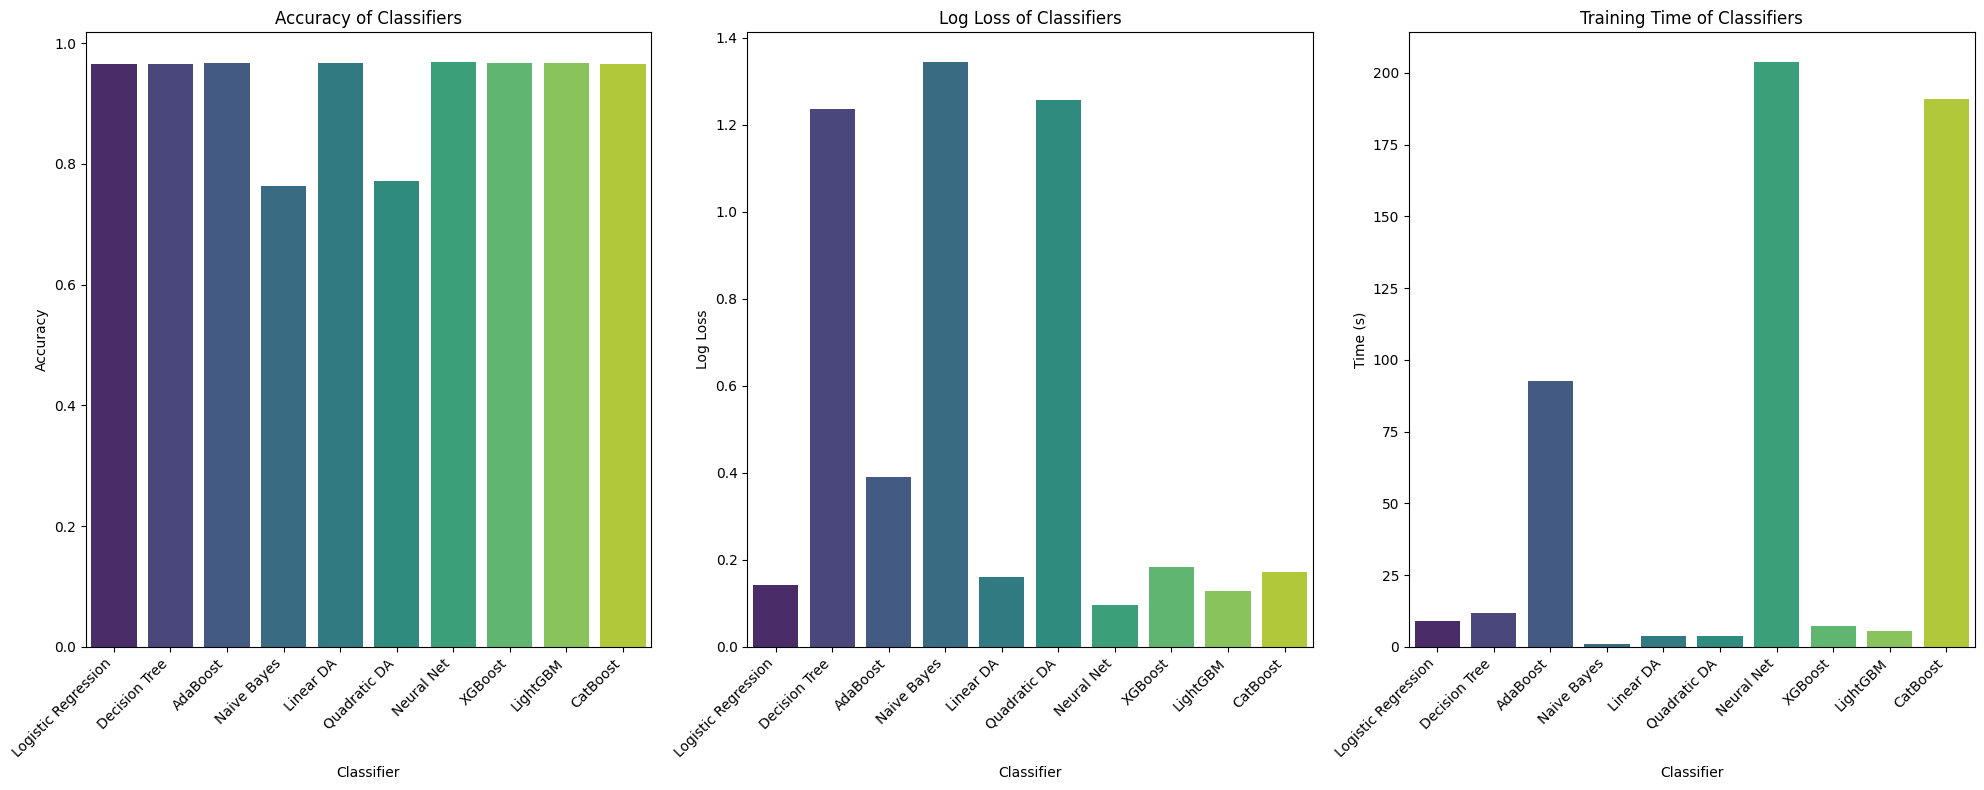

In [27]:
import warnings
warnings.filterwarnings('ignore')
# Plotting
plt.figure(figsize=(20, 8))

# Plot Accuracy
plt.subplot(1, 3, 1)
sns.barplot(x='Classifier', y='Accuracy', data=results_df, palette='viridis')
plt.title('Accuracy of Classifiers')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability

# Plot Log Loss
plt.subplot(1, 3, 2)
sns.barplot(x='Classifier', y='Log Loss', data=results_df, palette='viridis')
plt.title('Log Loss of Classifiers')
plt.xlabel('Classifier')
plt.ylabel('Log Loss')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability

# Plot Time
plt.subplot(1, 3, 3)
sns.barplot(x='Classifier', y='Time (s)', data=results_df, palette='viridis')
plt.title('Training Time of Classifiers')
plt.xlabel('Classifier')
plt.ylabel('Time (s)')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability

# Adjust layout
plt.tight_layout()
plt.show()


# Classifiers choosing.

These classifiers' performance is good with respect to Accuracy, logloss, training time.<br>
<br>
Now we want to evaluate the best classifiers comapring : <br>

1. Accuracy	Precision 
2. Recall	
3. F1 Score	
4. AUC-ROC	
5. Confusion Matrix	
6. Log Loss	
7. Balanced Accuracy	

**1. logistic regression &nbsp;&nbsp;&nbsp;&nbsp;2.XGBOOST&nbsp;&nbsp;&nbsp;&nbsp;3.LightGBM&nbsp;&nbsp;&nbsp;&nbsp;4.neural net(MLP_clf)**

In [28]:
# making dictionaries of classifiers
main_clfs = {
    'Logistic Regression': LogisticRegression(solver="liblinear", random_state=seed),
    'Neural Net': MLPClassifier(random_state=seed),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier()
}

In [29]:
import time

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, log_loss, balanced_accuracy_score
)

def train_clfs(X_train, X_test, y_train, y_test, classifiers):
    results = []

    for name, clf in classifiers.items():
        # Record the start time
        start_time = time.time()

        # Train the classifier
        clf.fit(X_train, y_train)

        # Predict on the test set
        y_pred = clf.predict(X_test)

        # Calculate the various metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='binary')
        recall = recall_score(y_test, y_pred, average='binary')
        f1 = f1_score(y_test, y_pred, average='binary')
        balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
        confusion = confusion_matrix(y_test, y_pred)
        y_testn = y_test.to_numpy()
        # AUC-ROC score
        if hasattr(clf, "predict_proba"):
            y_pred_proba = clf.predict_proba(X_test)[:, 1]
            auc_roc = roc_auc_score(y_testn, y_pred_proba)
            log_loss_value = log_loss(y_testn, y_pred_proba)
        else:
            y_pred_proba = clf.decision_function(X_test)[:, 1]
            auc_roc = roc_auc_score(y_testn, y_pred_proba)
            log_loss_value = log_loss(y_testn, y_pred_proba)
        
        # Calculate training time
        elapsed_time = time.time() - start_time

        # Append the results
        results.append({
            'Classifier': name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'AUC-ROC': auc_roc,
            'Confusion Matrix': confusion,
            'Log Loss': log_loss_value,
            'Balanced Accuracy': balanced_accuracy,
            'Time (s)': elapsed_time
        })

        print(f"{name} classifier trained")
    
    # Convert results to DataFrame
    results_df = pd.DataFrame(results)
    
    return results_df


In [30]:
y_test_array = y_test_balanced.to_numpy()
y_train_array = y_train_balanced.to_numpy()
y_test_array[0:7]

array([0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [31]:
all_data = train_clfs(X_train_balanced, X_test_balanced, y_train_balanced,y_test_balanced, main_clfs)

Logistic Regression classifier trained
Neural Net classifier trained
XGBoost classifier trained
[LightGBM] [Info] Number of positive: 711100, number of negative: 711100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.060957 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3655
[LightGBM] [Info] Number of data points in the train set: 1422200, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM classifier trained


# Using smote:

In [32]:
styled_df = all_data.style.background_gradient(subset=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC'], cmap='coolwarm')

# Highlighting the minimum values in green and maximum in red
styled_df = styled_df.highlight_max(subset=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC'], color='lightgreen')
styled_df = styled_df.highlight_min(subset=['Log Loss', 'Time (s)'], color='lightgreen')

# Display the styled DataFrame
styled_df


,Classifier,Accuracy,Precision,Recall,F1 Score,AUC-ROC,Confusion Matrix,Log Loss,Balanced Accuracy,Time (s)
0,Logistic Regression,0.980541,0.962878,0.999620,0.980905,0.989232,[[227899 9135] [ 90 236944]],0.096939,0.980541,10.592642
1,Neural Net,0.982648,0.967428,0.998928,0.982926,0.993547,[[229062 7972] [ 254 236780]],0.064057,0.982648,221.112941
2,XGBoost,0.979338,0.964859,0.994912,0.979655,0.986067,[[228445 8589] [ 1206 235828]],0.109064,0.979338,8.561900
3,LightGBM,0.981958,0.965340,0.999814,0.982275,0.989362,[[228525 8509] [ 44 236990]],0.077773,0.981958,6.888631


# confusion metrix

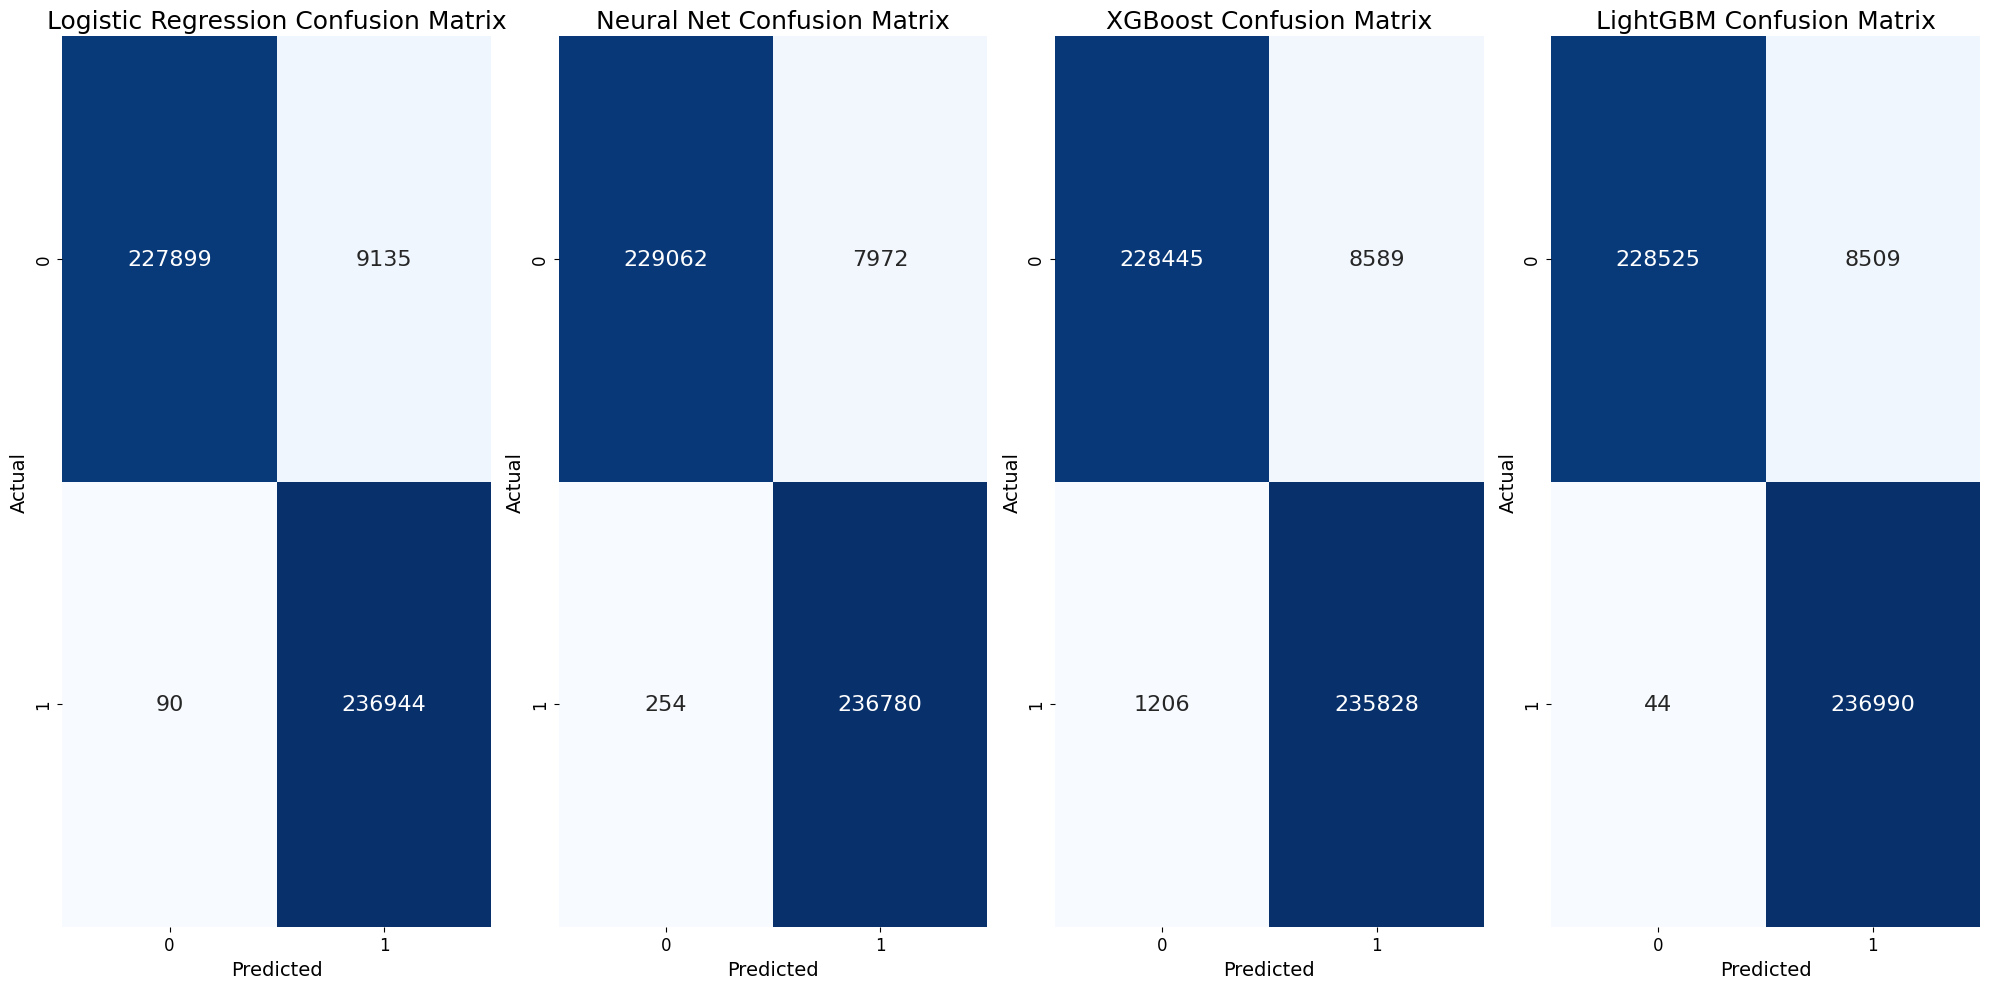

In [33]:
fig, axes = plt.subplots(1, len(all_data), figsize=(20, 10))  # Adjust height here

# Plot each confusion matrix
for i, (ax, cm, clf_name) in enumerate(zip(axes, all_data['Confusion Matrix'], all_data['Classifier'])):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False, annot_kws={"size": 16})  # Increase font size
    ax.set_title(f'{clf_name} Confusion Matrix', fontsize=18)  # Increase title font size
    ax.set_xlabel('Predicted', fontsize=14)  # Increase x-axis label font size
    ax.set_ylabel('Actual', fontsize=14)  # Increase y-axis label font size
    ax.tick_params(axis='both', which='major', labelsize=12)  # Increase tick label size

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


# 5. Analysis:

**We can choose model between xgboost and MLClassifier(neural net)  depending upon use case**

1. As analysing the confusion metrix we probably give priority to recall values.<br><br>
2. So MLPClassifier (Neural Net) can be the best classifier out of them.<br><br>
3. we are using SMOTE (Synthetic Minority Oversampling Technique ) [Industry preffered] and shuffle in data standardization.<br><br>
4. we will use hyper parameter tuning technique for false 1 value predction.<br><br>
5. Model will be a pipeline in which two methods [standerdization, classifier] are layer wise.

In [45]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline


# Continuous columns for scaling
continuous_columns = ['Column0', 'Column1', 'Column2', 'Column3', 'Column4', 
                      'Column5', 'Column6', 'Column7', 'Column8', 'Column9', 
                      'Column14', 'Column15']

# Preprocess features (scaling continuous columns)
def preprocess_features(df):
    scaler = StandardScaler()
    df_scaled = df.copy()
    df_scaled[continuous_columns] = scaler.fit_transform(df_scaled[continuous_columns])
    return df_scaled

# Function to preprocess and balance data using SMOTE
def preprocess_and_balance(X_train, y_train, smote_ratio=1.0):
    if not isinstance(y_train, pd.Series):
        raise ValueError("y_train should be a pandas Series")

    # Merge X_train and y_train into a single DataFrame
    df = pd.concat([X_train, y_train], axis=1)

    # Extract the target column name
    target_column = y_train.name

    # Separate features and target
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Apply SMOTE for balancing
    smote = SMOTE(sampling_strategy=smote_ratio, random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Create DataFrames from resampled arrays
    X_train_balanced = pd.DataFrame(X_resampled, columns=X.columns)
    y_train_balanced = pd.Series(y_resampled, name=target_column)

    # Shuffle the balanced dataset
    X_train_balanced, y_train_balanced = shuffle(X_train_balanced, y_train_balanced, random_state=42)
    
    return X_train_balanced, y_train_balanced

# Define the pipeline with scaling and MLPClassifier
pipeline = ImbPipeline(steps=[
    ('scaler', StandardScaler()), 
    ('mlp', MLPClassifier(max_iter=500, random_state=42))
])

# Set hyperparameters for tuning
param_grid = {
    'mlp__hidden_layer_sizes': [(100,), (100, 50)],
    'mlp__activation': ['relu'],
    'mlp__solver': ['adam'],
    'mlp__alpha': [0.0001],
    'mlp__learning_rate': ['constant', 'adaptive']
}

# GridSearchCV to find the best parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

# Training and evaluation function
def train_classifiers(X_train, X_test, y_train, y_test, clf):
    # Record the start time
    start_time = time.time()

    # Train the classifier using GridSearchCV
    clf.fit(X_train, y_train)

    # Get the best estimator from the grid search
    best_model = clf.best_estimator_

    # Predict on the test set
    y_pred = best_model.predict(X_test)

    # Predict probabilities for log loss calculation
    y_pred_proba = best_model.predict_proba(X_test)
    log_loss_value = log_loss(y_test, y_pred_proba)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate training time
    elapsed_time = time.time() - start_time

    # Output results
    results = {
        'Best Parameters': clf.best_params_,
        'Accuracy': accuracy,
        'Log Loss': log_loss_value,
        'Time (s)': elapsed_time
    }

    return results

# Assuming X_train, X_test, y_train_series, y_test_series are preprocessed
# Perform SMOTE and balance the data
X_train_balanced, y_train_balanced = preprocess_and_balance(X_train, y_train_series)

# Preprocess X_test as well
X_test_processed = preprocess_features(X_test)

# Train the model
results = train_classifiers(X_train_balanced, X_test_processed, y_train_balanced, y_test_series, grid_search)

# Output results
print("Results:", results)


Fitting 3 folds for each of 4 candidates, totalling 12 fits


In [40]:
! pip install joblib

In [41]:
import joblib

# Save the best model to a file
joblib.dump(grid_search.best_estimator_, 'mlp_classifier_model.pkl')

print("Model saved as mlp_classifier_model.pkl")


Model saved as mlp_classifier_model.pkl


In [42]:
# Load the saved model from file
loaded_model = joblib.load('mlp_classifier_model.pkl')

# Use the loaded model to make predictions
y_pred = loaded_model.predict(X_test_processed)

In [43]:
def evaluate_model(y_true, y_pred, y_pred_proba=None):
    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)
    
    # Precision
    precision = precision_score(y_true, y_pred)
    
    # Recall
    recall = recall_score(y_true, y_pred)
    
    # F1 Score
    f1 = f1_score(y_true, y_pred)
    
    # AUC-ROC (only if probabilities are provided)
    if y_pred_proba is not None:
        auc = roc_auc_score(y_true, y_pred_proba[:, 1])  # Assuming binary classification
    else:
        auc = None
    
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Log Loss (only if probabilities are provided)
    if y_pred_proba is not None:
        log_loss_value = log_loss(y_true, y_pred_proba)
    else:
        log_loss_value = None
    
    # Balanced Accuracy
    balanced_acc = balanced_accuracy_score(y_true, y_pred)
    
    # Print the results
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    if auc is not None:
        print(f"AUC-ROC: {auc:.4f}")
    print(f"Balanced Accuracy: {balanced_acc:.4f}")
    if log_loss_value is not None:
        print(f"Log Loss: {log_loss_value:.4f}")
    
    # Confusion matrix visualization
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.show()
    
    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC-ROC': auc,
        'Confusion Matrix': cm,
        'Log Loss': log_loss_value,
        'Balanced Accuracy': balanced_acc
    }


Accuracy: 0.9557
Precision: 0.7251
Recall: 0.8545
F1 Score: 0.7845
AUC-ROC: 0.9824
Balanced Accuracy: 0.9104
Log Loss: 0.1043


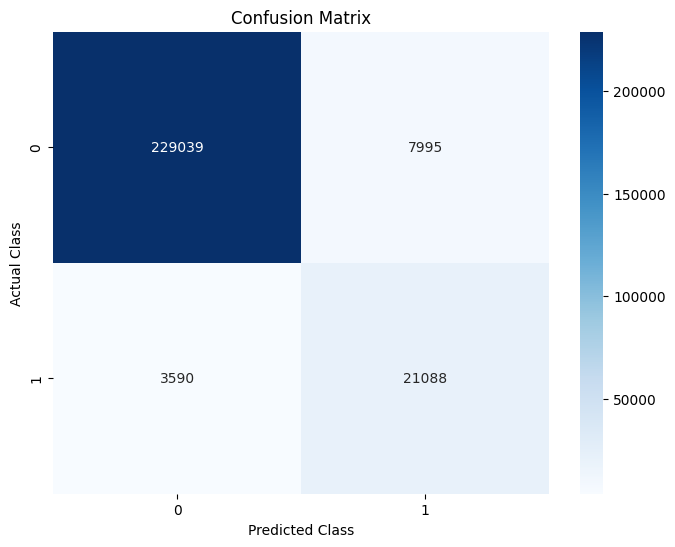

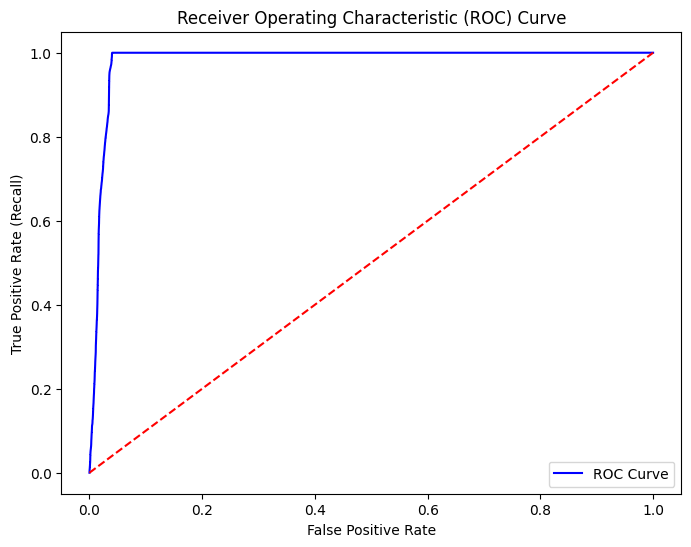

In [44]:
# Get  predicted probabilities (y_pred and y_pred_proba)
y_pred_proba = loaded_model.predict_proba(X_test_processed)

# Evaluate the model
metrics_results = evaluate_model(y_test_series, y_pred, y_pred_proba)

def plot_roc_curve(y_true, y_pred_proba):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba[:, 1])  # Assuming binary classification
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, color='blue', label='ROC Curve')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

# Call the function to plot ROC curve
plot_roc_curve(y_test_series, y_pred_proba)


# Key methodology
**Data oriented approach <br>(recommended by CS professor of Stanford: Andrew Ng)**

<h2>1. Handling Imbalanced Data with SMOTE</h2>
<p>
   The dataset  had an imbalanced target variable (0 and 1). To prevent the classifier from being biased toward the majority class (0), 
   i used <strong>SMOTE (Synthetic Minority Over-sampling Technique)</strong>. SMOTE synthetically generates new instances of the minority class by 
   interpolating between existing minority class instances, helping balance the class distribution. This step was crucial to ensure that the model performs well on both classes.
</p>

<h2>2. Model Selection: MLPClassifier</h2>
<p>
   chose to implement a <strong>Multilayer Perceptron (MLP) Classifier</strong> from sklearn, a neural network-based model capable of learning complex patterns in data. MLP is a robust choice when the relationship between features and the target variable is non-linear.
</p>

<h3>MLP Architecture:</h3>
<ul>
   <li><strong>Hidden Layers:</strong> Two hidden layers with 100 and 50 units respectively, allowing the model to capture complex interactions in the data.</li>
   <li><strong>Activation Function:</strong> 'ReLU' (Rectified Linear Unit), introduces non-linearity and helps the model learn better from the data.</li>
   <li><strong>Solver:</strong> 'Adam', a gradient-based optimizer efficient for large datasets and sparse gradients.</li>
   <li><strong>Alpha:</strong> A small L2 regularization term of 0.0001, helping prevent overfitting by penalizing large weights.</li>
   <li><strong>Learning Rate:</strong> 'Adaptive', meaning the learning rate decreases as training progresses, stabilizing convergence and avoiding overshooting the optimal weights.</li>
</ul>

<h2>3. Training and Validation</h2>
<p>
   After preprocessing the data using SMOTE and configuring the MLPClassifier, you trained the model on the dataset. While training, you ignored potential 
   trade-offs related to training time, focusing purely on maximizing model performance.
</p>
<p>
   The validation was performed on an imbalanced dataset to observe the model's effectiveness in real-world scenarios, where class 0 is more frequent than class 1.
</p>

<h2>4. Evaluation Metrics</h2>
<p>The performance of model was assessed using several key metrics to provide a comprehensive evaluation:</p>
<ul>
   <li><strong>Accuracy:</strong> 0.9557 — The overall correct predictions made by the model.</li>
   <li><strong>Precision:</strong> 0.7251 and <strong>Recall:</strong> 0.8545 — Precision focuses on how many predicted positives were actually positive, while recall measures how many actual positives were correctly predicted.</li>
   <li><strong>F1 Score:</strong> 0.7845 — A balanced metric that combines precision and recall.</li>
   <li><strong>AUC-ROC:</strong> 0.9824 — This high value indicates excellent discrimination between classes.</li>
   <li><strong>Balanced Accuracy:</strong> 0.9104 — This adjusts for class imbalance, showing good performance across both classes.</li>
   <li><strong>Log Loss:</strong> 0.1043 — A low log loss indicates the model is confident in its predictions.</li>
</ul>

<h2>5. Confusion Matrix</h2>
<p>
   The confusion matrix provided a more granular view of your model's performance on the validation set:
</p>
<ul>
   <li><strong>True Negatives:</strong> 229039</li>
   <li><strong>False Positives:</strong> 7995</li>
   <li><strong>False Negatives:</strong> 3590</li>
   <li><strong>True Positives:</strong> 21088</li>
</ul>
<p>
   These values demonstrate that the model has been able to balance the trade-off between false positives and false negatives fairly well, especially given the class imbalance.
</p>

<h2>6. Conclusion</h2>
<p>
   By leveraging SMOTE for data balancing and MLPClassifier for model training, developed a model that effectively handles imbalanced data and delivers strong performance across several key metrics.
</p>
